# **Functions to be used many times**

In [79]:
!pip install memory-profiler

### preparing data

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

def prepare_data(data, target_column):

  # If column is categorical, replace with the most frequent value, else with the mean
  for col in data:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

  # Divide the data to features and target
  X = data.drop(target_column, axis=1)
  y = data[target_column]

  # Split the data into training and testing set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Encode categorical columns in features using label encoder
  label_encoder = LabelEncoder()
  categorical_columns = X.select_dtypes(include=['object']).columns

  for column in categorical_columns:
      X_train[column] = label_encoder.fit_transform(X_train[column])
      X_test[column] = label_encoder.transform(X_test[column])

  # Encode the target variable using label encoder
  y_encoder = LabelEncoder()
  y_train = y_encoder.fit_transform(y_train)
  y_test = y_encoder.transform(y_test)

  # Standardize features
  numerical_columns = X_train.select_dtypes(include=['number']).columns
  scaler = StandardScaler()
  X_train[numerical_columns] = scaler.fit_transform(X_train)
  X_test[numerical_columns] = scaler.transform(X_test)

  return X_train, X_test, y_train, y_test

### Train and evaluate Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import memory_profiler

def train_and_evaluate_rfc(X_train, X_test, y_train, y_test):

  # Define the random forest model
  random_forest_model = RandomForestClassifier(random_state=42)

  # Define hyperparameter grid
  param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [50, 100, 200, 250]
  }

  # Perform Grid Search on the hyperparameters
  t_start = time.time()
  grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
  grid_search.fit(X_train, y_train)
  t_end = time.time()

  # Get the best model based on the grid search
  best_model = grid_search.best_estimator_
  best_model.fit(X_train, y_train)

  # Predict y for X_test
  y_pred = best_model.predict(X_test)

  best_params = grid_search.best_params_
  print(f'The bast hyperparameters for random forest classifier:\n{best_params}')

  best_accuracy = grid_search.best_score_
  print(f'The best accuracy for random forest classifier:\n{best_accuracy}')

  print('****Evaluation metrics:****')

  test_accuracy = accuracy_score(y_test, y_pred)
  print(f'The test accuracy for random forest classifier:\n{test_accuracy}')

  test_precision = precision_score(y_test, y_pred, average='weighted')
  print(f'The test precision for random forest classifier:\n{test_precision}')

  test_recall = recall_score(y_test, y_pred, average='weighted')
  print(f'The test recall for random forest classifier:\n{test_recall}')

  test_f1 = f1_score(y_test, y_pred, average='weighted')
  print(f'The test f1 score for random forest classifier:\n{test_f1}')

  print(f'Training Time for random forest classifier:\n{t_end - t_start} seconds')
  print(f'Memory Usage for random forest classifier:\n{memory_profiler.memory_usage()[0]} MB\n')

  results = {'accuracy': test_accuracy, 'precision': test_precision, 'recall': test_recall, 'f1_score': test_f1}

  return results

### Train and evaluate XGBoost

In [82]:
from xgboost import XGBClassifier

def train_and_evaluate_xgb(X_train, X_test, y_train, y_test):

  # Define the XGBoost classifier
  xgb_model = XGBClassifier(random_state=42)

  # Define hyperparameter grid
  param_grid = {
      'n_estimators': [50, 100, 200, 250],
      'max_depth': [5, 10, 15],
      'learning_rate': [0.05, 0.1, 0.2],
      'subsample': [0.8, 0.9, 1.0],
  }

  # Perform Grid Search on the hyperparameters
  t_start = time.time()
  grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
  grid_search.fit(X_train, y_train)
  t_end = time.time()

  # Get the best model based on the grid search
  best_model = grid_search.best_estimator_
  best_model.fit(X_train, y_train)

  # Predict y for X_test
  y_pred = best_model.predict(X_test)

  best_params = grid_search.best_params_
  print(f'The bast hyperparameters for XGBoost:\n{best_params}')

  best_accuracy = grid_search.best_score_
  print(f'The best accuracy for XGBoost:\n{best_accuracy}')

  print('****Evaluation metrics:****')

  test_accuracy = accuracy_score(y_test, y_pred)
  print(f'The test accuracy for XGBoost:\n{test_accuracy}')

  test_precision = precision_score(y_test, y_pred, average='weighted')
  print(f'The test precision for XGBoost:\n{test_precision}')

  test_recall = recall_score(y_test, y_pred, average='weighted')
  print(f'The test recall for XGBoost:\n{test_recall}')

  test_f1 = f1_score(y_test, y_pred, average='weighted')
  print(f'The test f1 score for XGBoost:\n{test_f1}')

  print(f'Training Time XGBoost:\n{t_end - t_start} seconds')
  print(f'Memory Usage XGBoost:\n{memory_profiler.memory_usage()[0]} MB')

  results = {'accuracy': test_accuracy, 'precision': test_precision, 'recall': test_recall, 'f1_score': test_f1}

  return results

### Plot comparison

In [83]:
import matplotlib.pyplot as plt


def plot_comparison(rfc_metrics, XGBoost_metrics):

  metrics = ['accuracy', 'precision', 'recall', 'f1_score']
  metrics_n = 4
  index = np.arange(metrics_n)

  fig, ax = plt.subplots()

  # Plot Random Forest results
  rfc_values = [rfc_metrics[i] for i in metrics]
  rfc_bars = ax.bar(index, rfc_values, 0.35, label='Random Forest Classifier')

  # Plot XGBoost results
  xgb_values = [XGBoost_metrics[i] for i in metrics]
  xgb_bars = ax.bar(index + 0.35, xgb_values, 0.35, label='XGBoost')

  # Configure the plot
  ax.set_xlabel('Metrics')
  ax.set_ylabel('Scores')
  ax.set_title('Comparison of Random Forest and XGBoost Results')
  ax.set_xticks(index + 0.35 / 2)
  ax.set_xticklabels(metrics)
  ax.legend()

  # Show the plot
  plt.show()

# **Imbalanced Classes**

In [84]:
# Load the data from the website
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
parkinson_data = pd.read_csv(url, header=0)

# Remove the name column because its not needed
parkinson_data = parkinson_data.drop('name', axis=1)

# Print the number of status when its 1 and when its 0
status_counts = parkinson_data['status'].value_counts()

print("Count when status is 0:", status_counts[0])
print("Count when status is 1:", status_counts[1])

# Prepare and split the data
X_train, X_test, y_train, y_test = prepare_data(parkinson_data, 'status')

parkinson_data.info()

Count when status is 0: 48
Count when status is 1: 147
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    fl

In [85]:
parkinson_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [86]:
print('Impalanced classes: Random Forest Classifier')
rfc_results = train_and_evaluate_rfc(X_train, X_test, y_train, y_test)

print('############################################################################\n')

print('Impalanced classes: XGBoost')
XGBoost_results = train_and_evaluate_xgb(X_train, X_test, y_train, y_test)

Impalanced classes: Random Forest Classifier
The bast hyperparameters for random forest classifier:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
The best accuracy for random forest classifier:
0.9187830687830688
****Evaluation metrics:****
The test accuracy for random forest classifier:
0.9322033898305084
The test precision for random forest classifier:
0.9318065869281786
The test recall for random forest classifier:
0.9322033898305084
The test f1 score for random forest classifier:
0.9305353779930052
Training Time for random forest classifier:
97.111257314682 seconds
Memory Usage for random forest classifier:
975.578125 MB

############################################################################

Impalanced classes: XGBoost
The bast hyperparameters for XGBoost:
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.9}
The best accuracy for XGBoost:
0.9261904761904762
****Evaluation metrics:****
The test accuracy for XGBo

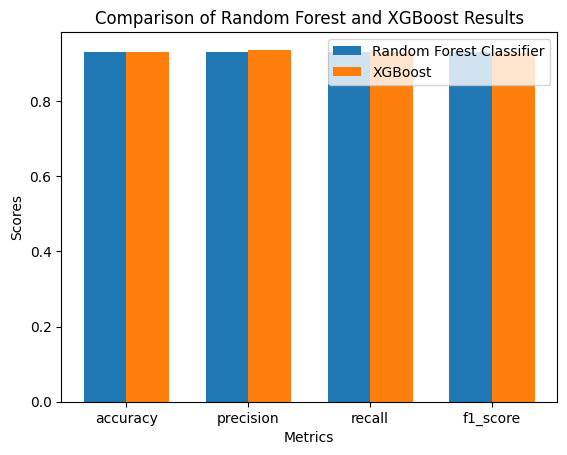

In [87]:
# Plot the results
plot_comparison(rfc_results, XGBoost_results)

# **Noisy data or features**

In [88]:
# Load the data from url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

heart_disease_data = pd.read_csv(url, names=column_names, na_values="?")


# Calculate the percentage of rows that has outliers
numerical_columns = heart_disease_data.select_dtypes(include=['float64']).columns
outliers = heart_disease_data[numerical_columns].apply(lambda x: x[(x - x.mean()).abs() > 2.5 * x.std()])
rows_with_outliers = outliers[~outliers.isnull().all(axis=1)].shape[0]

# Display the result
print(f"Percentage of outliers {(rows_with_outliers/heart_disease_data.shape[0])*100}%")

X_train, X_test, y_train, y_test = prepare_data(heart_disease_data, 'target')

heart_disease_data.info()

Percentage of outliers 6.9306930693069315%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [89]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [90]:
print('Noisy Data: Random Forest Classifier')
rfc_results = train_and_evaluate_rfc(X_train, X_test, y_train, y_test)

print('############################################################################\n')

print('Noisy Data: XGBoost')
XGBoost_results = train_and_evaluate_xgb(X_train, X_test, y_train, y_test)

Noisy Data: Random Forest Classifier
The bast hyperparameters for random forest classifier:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
The best accuracy for random forest classifier:
0.6129568106312292
****Evaluation metrics:****
The test accuracy for random forest classifier:
0.5494505494505495
The test precision for random forest classifier:
0.4475908706677937
The test recall for random forest classifier:
0.5494505494505495
The test f1 score for random forest classifier:
0.48562389361901115
Training Time for random forest classifier:
107.22732138633728 seconds
Memory Usage for random forest classifier:
975.578125 MB

############################################################################

Noisy Data: XGBoost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The bast hyperparameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
The best accuracy for XGBoost:
0.6228128460686599
****Evaluation metrics:****
The test accuracy for XGBoost:
0.5164835164835165
The test precision for XGBoost:
0.44897959183673475
The test recall for XGBoost:
0.5164835164835165
The test f1 score for XGBoost:
0.4801352493660186
Training Time XGBoost:
67.06549549102783 seconds
Memory Usage XGBoost:
975.578125 MB


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


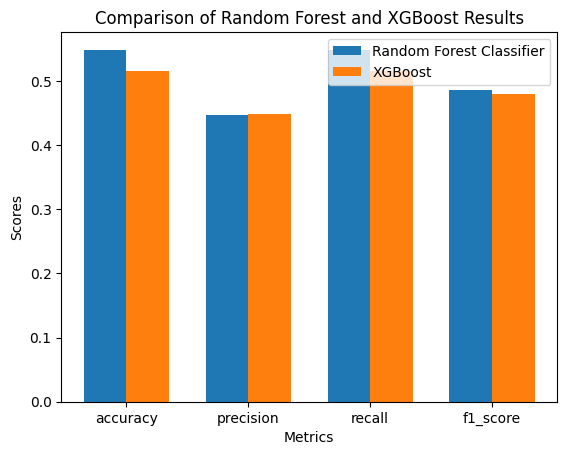

In [91]:
# Plot the results
plot_comparison(rfc_results, XGBoost_results)

# **Large Dataset**

In [92]:
# Load the data from the website
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

incomes_data = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)
print(f"The number of rows in the incomes dataset: {incomes_data.shape[0]}")

X_train, X_test, y_train, y_test = prepare_data(incomes_data, 'income')

incomes_data.info()

The number of rows in the incomes dataset: 32561
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [93]:
incomes_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
print('Large Dataset: Random Forest Classifier')
rfc_results = train_and_evaluate_rfc(X_train, X_test, y_train, y_test)

print('############################################################################')

print('Large Dataset: XGBoost')
XGBoost_results = train_and_evaluate_xgb(X_train, X_test, y_train, y_test)

Large Dataset: Random Forest Classifier
The bast hyperparameters for random forest classifier:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
The best accuracy for random forest classifier:
0.8639437145144241
****Evaluation metrics:****
The test accuracy for random forest classifier:
0.8645716040536391
The test precision for random forest classifier:
0.8588297698294555
The test recall for random forest classifier:
0.8645716040536391
The test f1 score for random forest classifier:
0.8586092478613121
Training Time for random forest classifier:
870.6161205768585 seconds
Memory Usage for random forest classifier:
975.578125 MB

############################################################################
Large Dataset: XGBoost
The bast hyperparameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250, 'subsample': 1.0}
The best accuracy for XGBoost:
0.8729379349932112
****Evaluation metrics:****
The test accuracy for XGBoost:
0.87

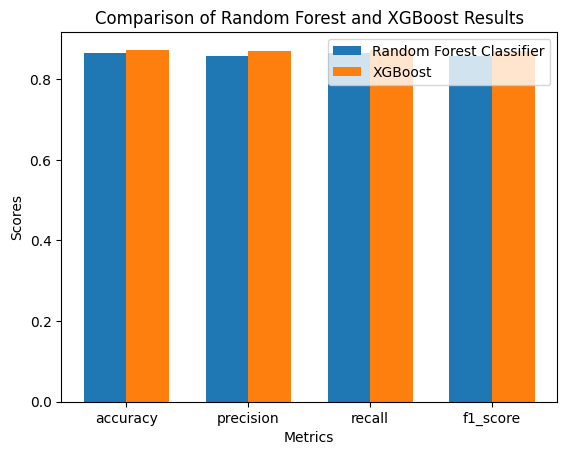

In [95]:
# Plot the results
plot_comparison(rfc_results, XGBoost_results)